# Evaluating Player Similarity Predictions

In our previous experiments, our results are not reliable due to our training data crossing with test data!

To simulate what would happen realistically, we need to split train and test data before we start our similarity pairing & prediction.


In [3]:
import pickle
import warnings
from pathlib import Path

from opal.score.dataset import Dataset
from opal.score.preprocessing_dynamic import PreprocessingDynamic
from opal.score.similarity.similarity_eval import similarity_model_eval, plot_eval

if True:
    # PyCharm linting keeps wrecking this import, so it's in a True cond
    pass

warnings.filterwarnings('ignore')

data_path = Path("../../data/osu/scores/")

df = PreprocessingDynamic(
    Dataset(data_path, "top1k").joined_filtered_df,
    unpopular_maps_thres=0,
    unpopular_plays_thres=0,
    sr_min_thres=2.5,
    acc_filter=(0.8, 1),
    score_filter=None
).filter(calc_acc=True)
df_eval, sim = similarity_model_eval(df, 2, 0)

by_score_year 887452 -> 541019
by_sr 541019 -> 481548
by_unpopular_maps 481548 -> 481548
by_unpopular_plays 481548 -> 481548
by_acc_filter 481548 -> 481516
by_remove_mod 481516 -> 353211
Users Left: 992 | Beatmaps Left: 3757


Predicting Scores:  83%|████████▎ | 146261/176606 [1:37:38<20:15, 24.97it/s]  


KeyboardInterrupt: 

In [ ]:
df_eval.to_pickle(f"eval.pkl")

with open("sim_model.pkl", "wb+") as f:
    pickle.dump(sim, f)

To perform evaluation, we perform a 5-fold validation, 20% test, 80% train.

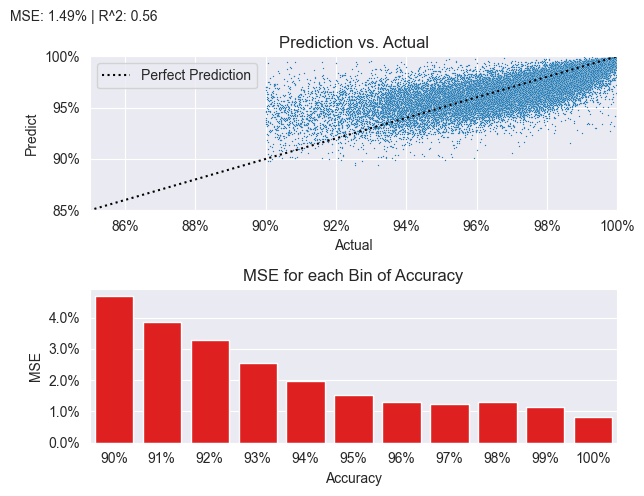

In [20]:
import pandas as pd

df_eval = pd.read_pickle("out0.04")
plot_eval(df_eval)